In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from LRSPattern import LRSPattern

## Simple slit pattern in absolute detector coordinates, 1 reference point

The folder test-patterns/ contains some simple test patterns in the right format, which I'll use to demonstrate capabilities. The pattern test_slit_detabs.txt contains a simple pattern in absolute detector coordinates. 


In [2]:
f = 'test-patterns/test_slit_detabs.txt'
pabs = LRSPattern(file=f)

The LRSPattern object has the following attributes:
* patt: the pattern x, y coordinates
* mode: LRS mode it applies to
* ref: the reference point
* frame: the coordinate frame
* CAR and CAL: which commissioning or calibration activities it relates to
* Comments
* Created

In [3]:
pabs.patt

Pointing,x,y
int64,float64,float64
1,321.13,300.7
2,322.13,300.7
3,323.13,300.7
4,324.13,300.7
5,325.13,300.7
6,326.13,300.7
7,327.13,300.7
8,328.13,300.7
9,329.13,300.7


In [4]:
print(pabs.frame)

  val  
-------
det-abs


In [5]:
print(pabs.ref)

val
---
  c


Pysiaf uses PRD version PRDOPSSOC-H-015
['c']
Pysiaf uses PRD version PRDOPSSOC-H-015


/Users/kendrew/miri/LRS_wg/MIRI-LRS-dithers/LRSPattern.py:288: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


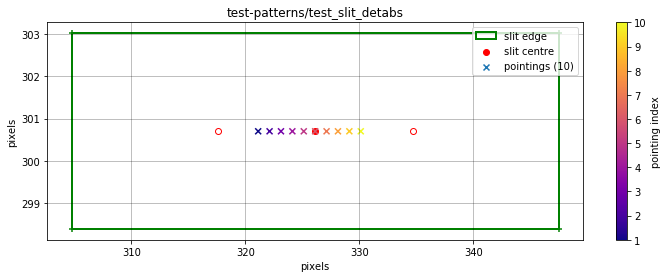

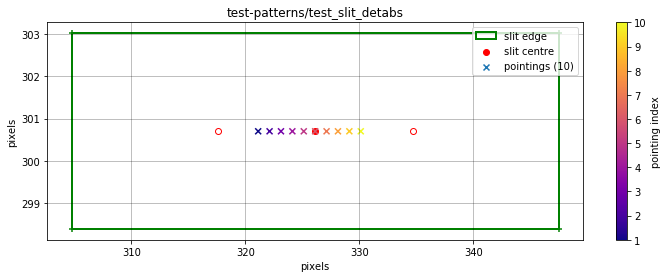

In [6]:
pabs.plot()


## Slit pattern in relative detector coordinates, single reference point

Same as above, only the pattern is defined in pixels relative to a reference point. The reference point is specified in the 'ref' attribute. 
* c: slit centre or nominal pointing position (for slitless)
* nod1, nod2: nod positions

In [7]:
f = 'test-patterns/test_slit_det.txt'
prel = LRSPattern(file=f)
prel.patt

Pointing,x,y
int64,float64,float64
1,-5.0,0.0
2,-4.0,0.0
3,-3.0,0.0
4,-2.0,0.0
5,-1.0,0.0
6,0.0,0.0
7,1.0,0.0
8,2.0,0.0
9,3.0,0.0


In [8]:
prel.ref

c


The .to_absolute() method, when run on a pattern specified in relative detector coordinates, will use the SIAF to translate the coordinates into absolute pixel values.

In [9]:
prel.to_absolute()

Converting pattern to absolute coordinates.....
Pysiaf uses PRD version PRDOPSSOC-H-015


In [10]:
prel.frame

['det-abs']

If we didn't convert the coordinates to absolute, the plot command would do this as part of plot computation. 

Pysiaf uses PRD version PRDOPSSOC-H-015
['c']
Pysiaf uses PRD version PRDOPSSOC-H-015


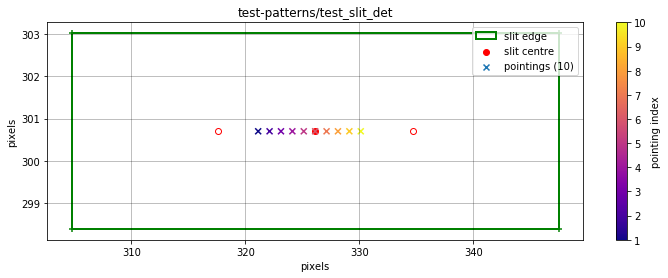

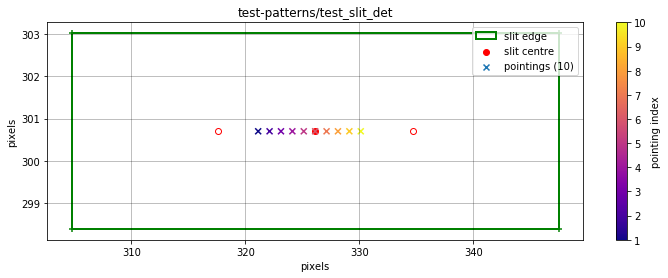

In [11]:
prel.plot()

## Slit pattern in relative detector coordinates, multiple reference points

Same as above, but this is for patterns that will be repeated at multiple locations, e.g. the nods. When such patterns are initialized, columns are added to accommodate the additional pointings. When converting to absolute coordinates, the coordinates will be read for the different reference locations and translated accordingly.

In [13]:
f = 'test-patterns/test_slit_det_multiref.txt'
pmult = LRSPattern(file=f)

In [14]:
pmult.ref

"c, nod1, nod2"


In [15]:
pmult.patt

Pointing,x,y,x1,y1,x2,y2
int64,float64,float64,float64,float64,float64,float64
0,0.0,-3.64,0.0,-3.64,0.0,-3.64
1,0.0,-2.73,0.0,-2.73,0.0,-2.73
2,0.0,-1.82,0.0,-1.82,0.0,-1.82
3,0.0,-0.91,0.0,-0.91,0.0,-0.91
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.91,0.0,0.91,0.0,0.91
6,0.0,1.82,0.0,1.82,0.0,1.82
7,0.0,2.73,0.0,2.73,0.0,2.73
8,0.0,3.64,0.0,3.64,0.0,3.64


In [16]:
pmult.frame

det-rel


Pysiaf uses PRD version PRDOPSSOC-H-015
['c', 'nod1', 'nod2']
Pysiaf uses PRD version PRDOPSSOC-H-015
Converting pattern to absolute coordinates.....
Pysiaf uses PRD version PRDOPSSOC-H-015


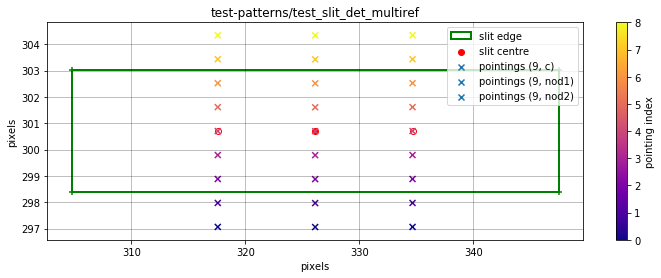

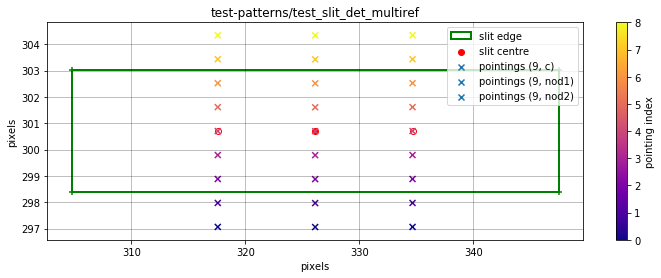

In [17]:
pmult.plot()